In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np

mat_data_set = [()]
# Load MATLAB file
mat_file = r'C:\Device5_ 1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device2  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device3  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

mat_file = r'C:\Device4  1.mat' 
mat_data = scipy.io.loadmat(mat_file)
mat_data_set = np.append(mat_data_set, mat_data)

#j=0 dev5
#j=1 dev2
#j=2 dev3
#j=3 dev4

ce_window_smooth = [None] * len(mat_data_set)

for j in range(len(mat_data_set)):
    measurement = mat_data_set[j]['measurement']
    transient = measurement['transient']
    
    total_time = 0
    new_time = 0
    original = 0 
    time = np.array([])
    ce_data_list = []
    
    for i in range(len(transient[0,0][0])):
        date_str = transient[0,0][0][i][0][0]
        time_str = date_str.split(' ')[1]
        hour, minute, second = map(int, time_str.split(':'))
        
        new_time = hour*3600 + minute*60 + second
        if i == 0:
            original = new_time
        total_time = new_time - original
    
        time = np.append(time, total_time)
        
        ce_data = transient[0,0][0][i][2][0][0][3][0]
        ce_data_list.append(ce_data)
    
    ce_data_array = np.array(ce_data_list) 
    
    ce_sampling_data = [()]
    for i in range(len(ce_data_array)):
        if time[i]>=2000 and np.min(ce_data_array[i])<=4.0:
            break
        ce_sampling_data = np.append(ce_sampling_data, np.average(ce_data_array[i]))
    
    def calculate_weighted_average(x, t, span=15):
        theta = 2 / (span + 1)
        numerator = 0
        denominator = 0
    
        for i in range(t + 1):
            weight = (1 - theta) ** (t - i)
            numerator += weight * x[i]
            denominator += weight
    
        yt = numerator / denominator
        return yt
    
    span = 15
    ce_window_smooth[j] = np.zeros(len(ce_sampling_data))
    for t in range(len(ce_sampling_data)):
        ce_window_smooth[j][t] = calculate_weighted_average(ce_sampling_data, t, span)

print("Done")

Done


In [2]:
for q in range(len(mat_data_set)):
    len_ori = len(ce_window_smooth[q])
    print(len_ori)

103
106
96
91


In [20]:
ce_window_smooth[0]

array([1.86417373, 1.92046763, 1.95441081, 1.96896824, 1.98257275,
       1.99632901, 2.00210537, 2.00627718, 2.08699118, 2.1567925 ,
       2.21506159, 2.2608682 , 2.29536181, 2.32843895, 2.35508591,
       2.37523461, 2.39534457, 2.47396991, 2.54464495, 2.60677227,
       2.66054004, 2.70639346, 2.74630589, 2.77993983, 2.80678657,
       2.83257333, 2.85332232, 2.87287648, 2.95001825, 3.01946123,
       3.0817419 , 3.19128928, 3.2917393 , 3.37913064, 3.45504552,
       3.52077264, 3.58084361, 3.63417309, 3.73986284, 3.83189447,
       3.91136298, 3.97990577, 4.03770107, 4.09345227, 4.14385795,
       4.188094  , 4.22679528, 4.26189483, 4.29112402, 4.31772561,
       4.34047723, 4.41703707, 4.48361483, 4.54508495, 4.597802  ,
       4.64946941, 4.69344228, 4.73480059, 4.76990595, 4.79949393,
       4.82921609, 4.85486406, 4.87739037, 4.89607893, 4.91261698,
       4.92687529, 4.94003325, 4.95291473, 4.96607417, 5.03764645,
       5.10388395, 5.15573944, 5.20296024, 5.2432183 , 5.27770

In [21]:
rul = [None] * len(mat_data_set)
for i in range(len(mat_data_set)):
    # Define the range of x
    x = np.linspace(0, len(ce_window_smooth[i]), len(ce_window_smooth[i]))

    # Calculate y values using the equation y = mx + c
    rul[i] = 1 - x/len(ce_window_smooth[i])

In [26]:
output_array = [None] * len(mat_data_set)
output_array

[None, None, None, None]

In [34]:
#train 234 test 5
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class CustomRNN(nn.Module):
    def __init__(self):
        super(CustomRNN, self).__init__()
        # Recurrent layer with 80 neurons
        self.rnn = nn.RNN(input_size=5, hidden_size=80, nonlinearity='tanh', batch_first=True)
        # Fully connected layer with 10 neurons
        self.fc1 = nn.Linear(80, 10)
        # Fully connected layer with 1 neuron
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        # Pass through RNN layer
        rnn_out, _ = self.rnn(x)  # rnn_out: [batch_size, seq_len, 80]
        # Take the last time step output from RNN
        rnn_out_last = rnn_out[:, -1, :]  # [batch_size, 80]
        # Pass through first fully connected layer
        fc1_out = self.fc1(rnn_out_last)  # [batch_size, 10]
        # Pass through second fully connected layer
        output = self.fc2(fc1_out)  # [batch_size, 1]
        return output

# Model, loss, and optimizer
model = CustomRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for q in range(len(mat_data_set)):
    if q in [1, 2, 3]:
        data = rul[q]
        
        # Prepare sliding window dataset
        window_size = 5
        inputs = []
        labels = []
        for i in range(len(data) - window_size):
            inputs.append(data[i:i + window_size])
            labels.append(data[i + window_size])
        
        inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
        labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor
        
        # Reshape inputs to match RNN input format
        inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)
        
        # Training loop
        epochs = 500
        for epoch in range(epochs):
            model.train()
        
            # Zero the gradients
            optimizer.zero_grad()
        
            # Forward pass
            outputs = model(inputs)  # Shape: [batch_size, 1]
        
            # Compute loss
            loss = criterion(outputs, labels)
        
            # Backward pass
            loss.backward()
        
            # Update weights
            optimizer.step()
        
            # Print loss every 10 epochs
            #if (epoch + 1) % 10 == 0:
                #print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")
        
        # Evaluate on the entire dataset
        model.eval()
        with torch.no_grad():
            final_outputs_1 = model(inputs)

test_data_index=0
data = rul[test_data_index]
        
# Prepare sliding window dataset
window_size = 5
inputs = []
labels = []
for i in range(len(data) - window_size):
    inputs.append(data[i:i + window_size])
    labels.append(data[i + window_size])

inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor

# Reshape inputs to match RNN input format
inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)

# Evaluate on the entire dataset
model.eval()
with torch.no_grad():
    final_outputs_1 = model(inputs)
    output_array[test_data_index] = final_outputs_1.squeeze().numpy()

    #print("Final outputs:", output_array[q])
print("Done")

Done


In [42]:
#train 345 test 2
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class CustomRNN(nn.Module):
    def __init__(self):
        super(CustomRNN, self).__init__()
        # Recurrent layer with 80 neurons
        self.rnn = nn.RNN(input_size=5, hidden_size=80, nonlinearity='tanh', batch_first=True)
        # Fully connected layer with 10 neurons
        self.fc1 = nn.Linear(80, 10)
        # Fully connected layer with 1 neuron
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        # Pass through RNN layer
        rnn_out, _ = self.rnn(x)  # rnn_out: [batch_size, seq_len, 80]
        # Take the last time step output from RNN
        rnn_out_last = rnn_out[:, -1, :]  # [batch_size, 80]
        # Pass through first fully connected layer
        fc1_out = self.fc1(rnn_out_last)  # [batch_size, 10]
        # Pass through second fully connected layer
        output = self.fc2(fc1_out)  # [batch_size, 1]
        return output

# Model, loss, and optimizer
model = CustomRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for q in range(len(mat_data_set)):
    if q in [2, 3, 0]:
        data = rul[q]
        
        # Prepare sliding window dataset
        window_size = 5
        inputs = []
        labels = []
        for i in range(len(data) - window_size):
            inputs.append(data[i:i + window_size])
            labels.append(data[i + window_size])
        
        inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
        labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor
        
        # Reshape inputs to match RNN input format
        inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)
        
        # Training loop
        epochs = 200
        for epoch in range(epochs):
            model.train()
        
            # Zero the gradients
            optimizer.zero_grad()
        
            # Forward pass
            outputs = model(inputs)  # Shape: [batch_size, 1]
        
            # Compute loss
            loss = criterion(outputs, labels)
        
            # Backward pass
            loss.backward()
        
            # Update weights
            optimizer.step()
        
            # Print loss every 10 epochs
            #if (epoch + 1) % 10 == 0:
                #print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")
        
        # Evaluate on the entire dataset
        model.eval()
        with torch.no_grad():
            final_outputs_1 = model(inputs)

test_data_index=1
data = rul[test_data_index]
        
# Prepare sliding window dataset
window_size = 5
inputs = []
labels = []
for i in range(len(data) - window_size):
    inputs.append(data[i:i + window_size])
    labels.append(data[i + window_size])

inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor

# Reshape inputs to match RNN input format
inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)

# Evaluate on the entire dataset
model.eval()
with torch.no_grad():
    final_outputs_1 = model(inputs)
    output_array[test_data_index] = final_outputs_1.squeeze().numpy()

    #print("Final outputs:", output_array[q])
print("Done")

Done


In [43]:
#train 245 test 3
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class CustomRNN(nn.Module):
    def __init__(self):
        super(CustomRNN, self).__init__()
        # Recurrent layer with 80 neurons
        self.rnn = nn.RNN(input_size=5, hidden_size=80, nonlinearity='tanh', batch_first=True)
        # Fully connected layer with 10 neurons
        self.fc1 = nn.Linear(80, 10)
        # Fully connected layer with 1 neuron
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        # Pass through RNN layer
        rnn_out, _ = self.rnn(x)  # rnn_out: [batch_size, seq_len, 80]
        # Take the last time step output from RNN
        rnn_out_last = rnn_out[:, -1, :]  # [batch_size, 80]
        # Pass through first fully connected layer
        fc1_out = self.fc1(rnn_out_last)  # [batch_size, 10]
        # Pass through second fully connected layer
        output = self.fc2(fc1_out)  # [batch_size, 1]
        return output

# Model, loss, and optimizer
model = CustomRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for q in range(len(mat_data_set)):
    if q in [1, 3, 0]:
        data = rul[q]
        
        # Prepare sliding window dataset
        window_size = 5
        inputs = []
        labels = []
        for i in range(len(data) - window_size):
            inputs.append(data[i:i + window_size])
            labels.append(data[i + window_size])
        
        inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
        labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor
        
        # Reshape inputs to match RNN input format
        inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)
        
        # Training loop
        epochs = 200
        for epoch in range(epochs):
            model.train()
        
            # Zero the gradients
            optimizer.zero_grad()
        
            # Forward pass
            outputs = model(inputs)  # Shape: [batch_size, 1]
        
            # Compute loss
            loss = criterion(outputs, labels)
        
            # Backward pass
            loss.backward()
        
            # Update weights
            optimizer.step()
        
            # Print loss every 10 epochs
            #if (epoch + 1) % 10 == 0:
                #print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")
        
        # Evaluate on the entire dataset
        model.eval()
        with torch.no_grad():
            final_outputs_1 = model(inputs)

test_data_index=2
data = rul[test_data_index]
        
# Prepare sliding window dataset
window_size = 5
inputs = []
labels = []
for i in range(len(data) - window_size):
    inputs.append(data[i:i + window_size])
    labels.append(data[i + window_size])

inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor

# Reshape inputs to match RNN input format
inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)

# Evaluate on the entire dataset
model.eval()
with torch.no_grad():
    final_outputs_1 = model(inputs)
    output_array[test_data_index] = final_outputs_1.squeeze().numpy()

    #print("Final outputs:", output_array[q])
print("Done")

Done


In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class CustomRNN(nn.Module):
    def __init__(self):
        super(CustomRNN, self).__init__()
        # Recurrent layer with 80 neurons
        self.rnn = nn.RNN(input_size=5, hidden_size=80, nonlinearity='tanh', batch_first=True)
        # Fully connected layer with 10 neurons
        self.fc1 = nn.Linear(80, 10)
        # Fully connected layer with 1 neuron
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        # Pass through RNN layer
        rnn_out, _ = self.rnn(x)  # rnn_out: [batch_size, seq_len, 80]
        # Take the last time step output from RNN
        rnn_out_last = rnn_out[:, -1, :]  # [batch_size, 80]
        # Pass through first fully connected layer
        fc1_out = self.fc1(rnn_out_last)  # [batch_size, 10]
        # Pass through second fully connected layer
        output = self.fc2(fc1_out)  # [batch_size, 1]
        return output

# Model, loss, and optimizer
model = CustomRNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for q in range(len(mat_data_set)):
    if q in [1, 2, 0]:
        data = rul[q]
        
        # Prepare sliding window dataset
        window_size = 5
        inputs = []
        labels = []
        for i in range(len(data) - window_size):
            inputs.append(data[i:i + window_size])
            labels.append(data[i + window_size])
        
        inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
        labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor
        
        # Reshape inputs to match RNN input format
        inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)
        
        # Training loop
        epochs = 200
        for epoch in range(epochs):
            model.train()
        
            # Zero the gradients
            optimizer.zero_grad()
        
            # Forward pass
            outputs = model(inputs)  # Shape: [batch_size, 1]
        
            # Compute loss
            loss = criterion(outputs, labels)
        
            # Backward pass
            loss.backward()
        
            # Update weights
            optimizer.step()
        
            # Print loss every 10 epochs
            #if (epoch + 1) % 10 == 0:
                #print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")
        
        # Evaluate on the entire dataset
        model.eval()
        with torch.no_grad():
            final_outputs_1 = model(inputs)

test_data_index=3
data = rul[test_data_index]
        
# Prepare sliding window dataset
window_size = 5
inputs = []
labels = []
for i in range(len(data) - window_size):
    inputs.append(data[i:i + window_size])
    labels.append(data[i + window_size])

inputs = torch.tensor(np.array(inputs), dtype=torch.float32)  # Convert numpy array to tensor
labels = torch.tensor(np.array(labels), dtype=torch.float32).unsqueeze(1)  # Convert numpy array to tensor

# Reshape inputs to match RNN input format
inputs = inputs.unsqueeze(1)  # Shape: [93, 1, 10] (batch_size, seq_len, input_size)

# Evaluate on the entire dataset
model.eval()
with torch.no_grad():
    final_outputs_1 = model(inputs)
    output_array[test_data_index] = final_outputs_1.squeeze().numpy()

    #print("Final outputs:", output_array[q])
print("Done")

Done


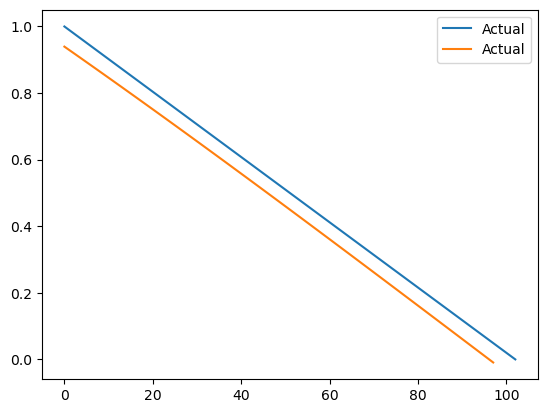

98


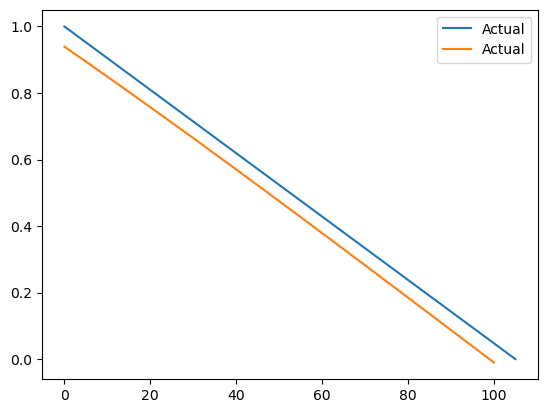

101


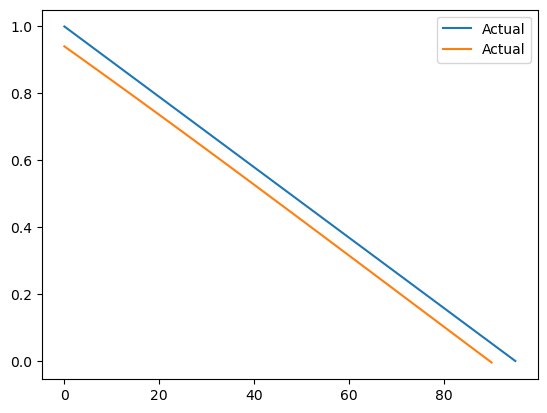

91


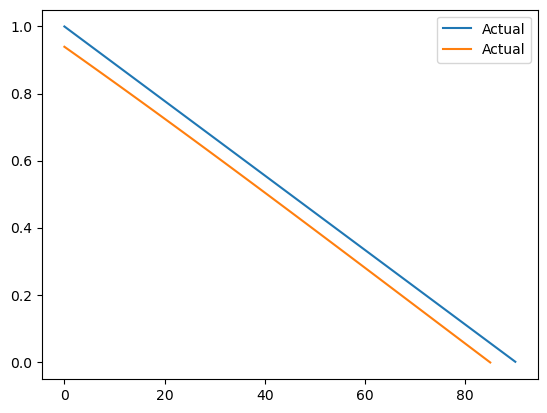

86


In [45]:
for i in range(len(mat_data_set)):
    plt.plot(rul[i], label='Actual')
    plt.plot(output_array[i], label='Actual')
    plt.legend()
    plt.show()
    print(len(output_array[i]))

In [3]:
ce_window_smooth

[array([1.86417373, 1.92046763, 1.95441081, 1.96896824, 1.98257275,
        1.99632901, 2.00210537, 2.00627718, 2.08699118, 2.1567925 ,
        2.21506159, 2.2608682 , 2.29536181, 2.32843895, 2.35508591,
        2.37523461, 2.39534457, 2.47396991, 2.54464495, 2.60677227,
        2.66054004, 2.70639346, 2.74630589, 2.77993983, 2.80678657,
        2.83257333, 2.85332232, 2.87287648, 2.95001825, 3.01946123,
        3.0817419 , 3.19128928, 3.2917393 , 3.37913064, 3.45504552,
        3.52077264, 3.58084361, 3.63417309, 3.73986284, 3.83189447,
        3.91136298, 3.97990577, 4.03770107, 4.09345227, 4.14385795,
        4.188094  , 4.22679528, 4.26189483, 4.29112402, 4.31772561,
        4.34047723, 4.41703707, 4.48361483, 4.54508495, 4.597802  ,
        4.64946941, 4.69344228, 4.73480059, 4.76990595, 4.79949393,
        4.82921609, 4.85486406, 4.87739037, 4.89607893, 4.91261698,
        4.92687529, 4.94003325, 4.95291473, 4.96607417, 5.03764645,
        5.10388395, 5.15573944, 5.20296024, 5.24